In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data.csv',sep=';',low_memory=False)

In [3]:
from datetime import datetime

In [4]:
def date_converter(dt):
    date = datetime.strptime(dt,'%d/%m/%Y')
    return date.strftime('%Y-%m-%d')

#data['DS'] = data['data'].apply(date_converter)

In [5]:
from fbprophet import Prophet

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


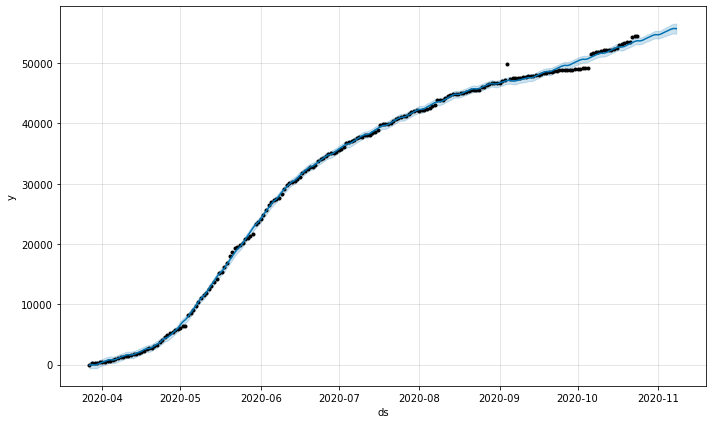

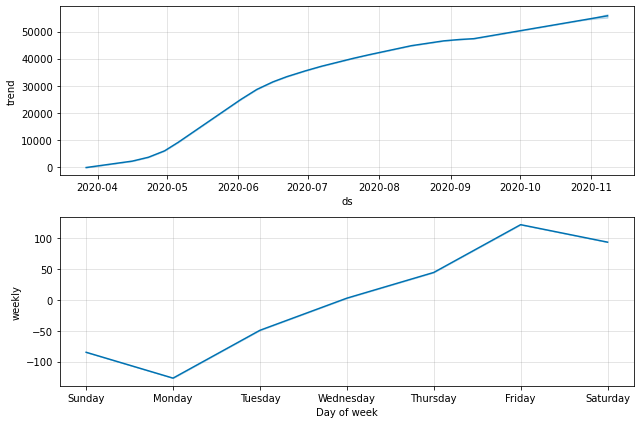

In [6]:
fortaleza_df = data[data['municipio'] == 'Fortaleza']
df = fortaleza_df[['data','casosAcumulado']]
df.columns = ['ds','y']

model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=15)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [15]:

municipios = data['municipio'].notna()



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


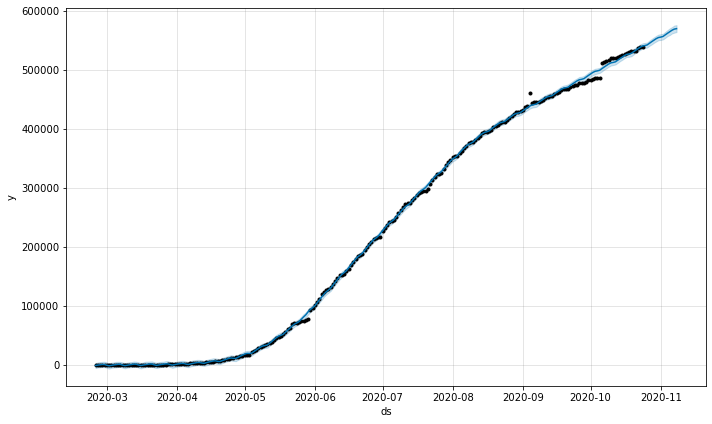

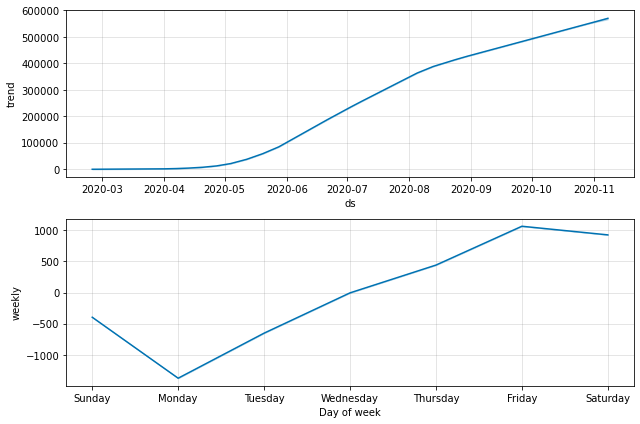

In [24]:
ceara = data['estado'] == 'CE'
ceara_df = data[ceara & municipios]
ceara_df = data[data['estado'] == 'CE'][['data',
                                         'estado',
                                         'municipio',
                                         'casosAcumulado']]
ceara_df = ceara_df.groupby(['data']).sum()
ceara_df = ceara_df.reset_index()
df = ceara_df[['data','casosAcumulado']]
df.columns = ['ds','y']

model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=15)
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)